## Week 4
### **Machine Learning - MGT 665**
### **Prof. Itauma**

**Group Members:**

Jithendar
Mukhesh
Nirav
Sai Srujana
Saketh



# **Health Care**

In today’s world, healthy living and wellness have become major focus areas in healthcare. As data analysts, you are tasked with helping a healthcare organization analyze trends in patient wellness to improve their healthy living programs. The organization has provided you with a simulated dataset that includes information such as exercise frequency, diet quality, sleep duration, stress levels, and BMI (Body Mass Index) for a population of patients. Your goal is to segment the patients into distinct clusters to better understand their wellness profiles and identify opportunities for targeted health interventions.

**Task Instructions:**

Dataset Creation:

* Provided is a simulated dataset with various health and wellness indicators (e.g., daily exercise time, number of healthy meals per day, hours of sleep per night, stress level score, BMI).

* Use this dataset to perform clustering and dimensionality reduction.

In [10]:
import pandas as pd
data = pd.read_csv('//Users//srujana//Downloads//Health.csv')

## **1. Exploratory Data Analysis (EDA)**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics of the data
print(data.describe())

       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

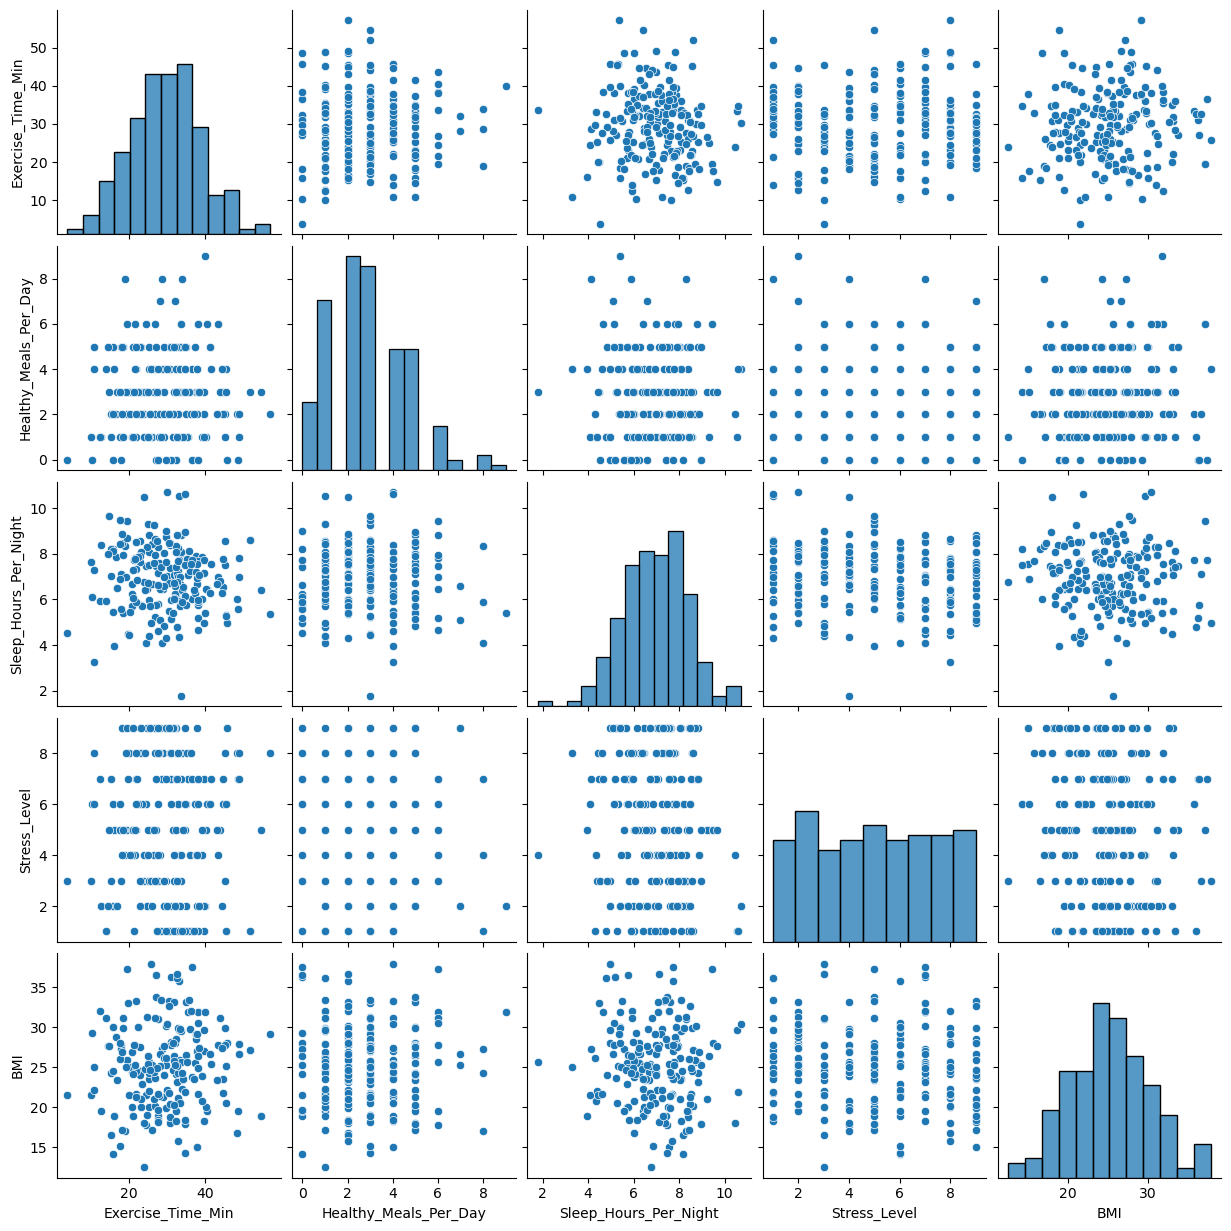

In [3]:
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

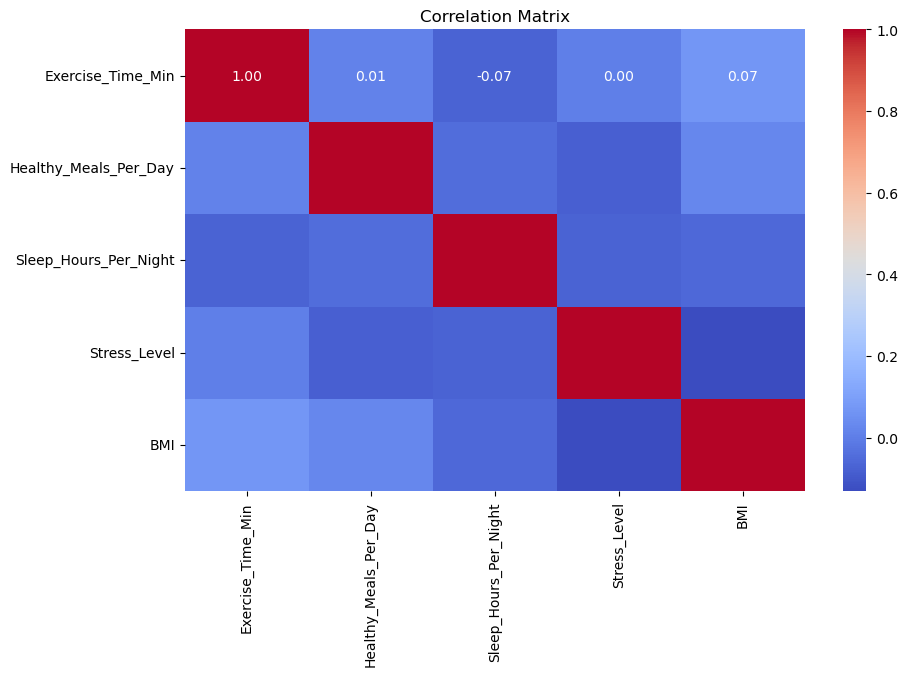

In [4]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


**correlation matrix heatmap, illustrating the correlation coefficients between different variables. The scale on the right ranges from -1 to 1, where:​**


* 1 indicates a perfect positive correlation.​

* 0 indicates no correlation.​

* -1 indicates a perfect negative correlation.​


* Exercise_Time_Min: shows no significant correlation with the other variables, with a slight positive correlation (0.07) with BMI and Stress_Level.​

* Stress_Level:  has a slight positive correlation with BMI (0.2) and a slight negative correlation with all other variables.​

* Sleep_Hours_Per_Night and Healthy_Meals_Per_Day:  have minimal correlations with other variables.​

​
**The colors in the heatmap range from dark red indicating high positive correlation to dark blue indicating high negative correlation, with lighter shades representing weaker correlations.​**

​

## **Clustering Techniques (K-Means and Hierarchical Clustering)**

**K-Means**

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluating K-Means clustering using silhouette score and WCSS (Within Cluster Sum of Squares)
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
wcss = kmeans.inertia_

print(f"Silhouette Score (K-Means): {silhouette_avg}")
print(f"Within-Cluster Sum of Squares (WCSS - K-Means): {wcss}")


Silhouette Score (K-Means): 0.15286808008586902
Within-Cluster Sum of Squares (WCSS - K-Means): 723.9307864008142


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Hierarchical Clustering**

Silhouette Score (Hierarchical): 0.13628495765267165


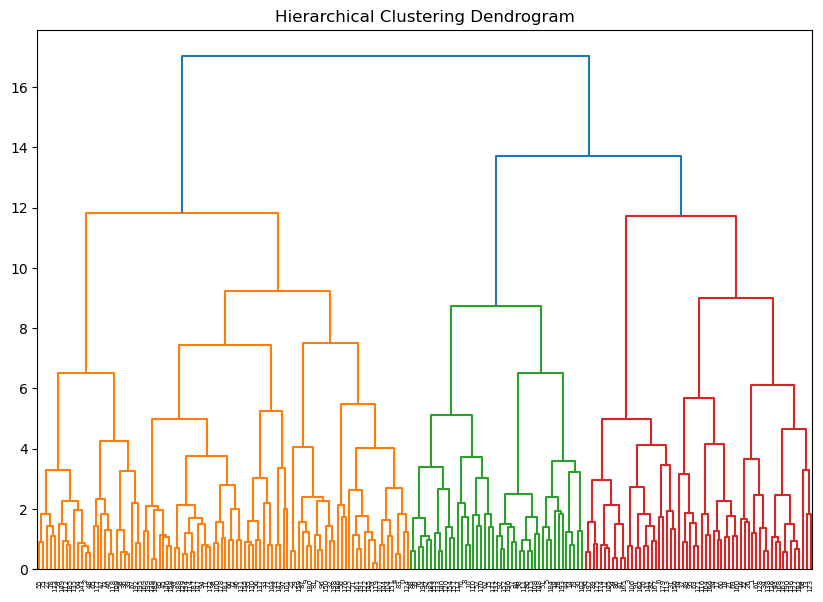

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Evaluating Hierarchical Clustering with silhouette score
silhouette_avg_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f"Silhouette Score (Hierarchical): {silhouette_avg_hierarchical}")

# Plotting the Dendrogram
Z = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


* **It visually represents the hierarchical relationships between data points using a tree structure. The different colors indicate distinct clusters formed at a particular distance threshold.​**


* **The Silhouette Score of 0.138, which is a measure of how well the clusters are defined. A score close to 1 indicates well-defined clusters, while a score close to 0 suggests that the clusters might overlap.​**

**Dimensionality Reduction (PCA)**

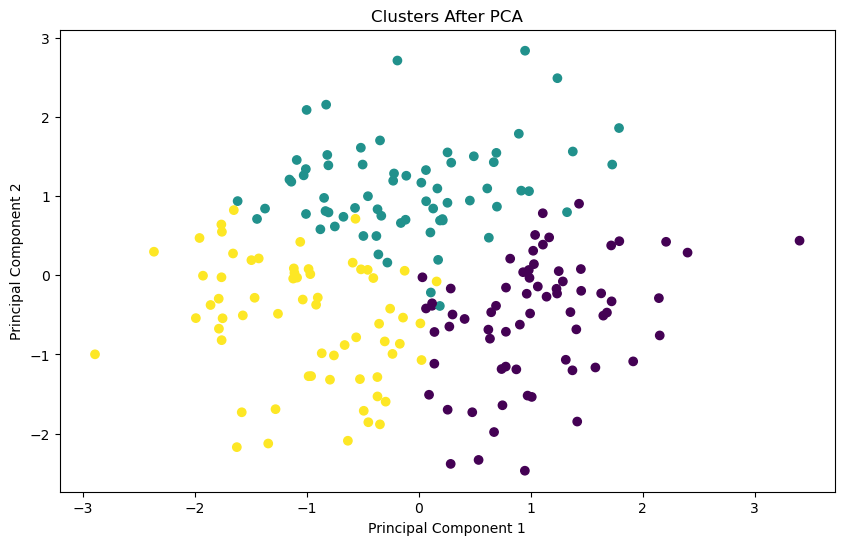

Explained variance by PCA components: [0.23691549 0.22082517]


In [7]:
from sklearn.decomposition import PCA

# Applying PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotting the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance by PCA components
print(f"Explained variance by PCA components: {pca.explained_variance_ratio_}")


* Cluster 0 (Vilot) - Represents patients with balanced wellness profiles.​

* Cluster 1 (Green) - Represents patients who focus more on exercise and sleep but less on healthy meals.​

* Cluster 2 (Yellow)-Represents patients who focus more on healthy meals but less on exercise and sleep.​

**Comparing Clustering Models Before and After PCA**

In [8]:
# K-Means after PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

# Silhouette score for K-Means with PCA
silhouette_avg_pca = silhouette_score(pca_data, kmeans_pca_labels)
print(f"Silhouette Score (K-Means with PCA): {silhouette_avg_pca}")

# Hierarchical Clustering after PCA
hierarchical_pca = AgglomerativeClustering(n_clusters=3)
hierarchical_pca_labels = hierarchical_pca.fit_predict(pca_data)

# Silhouette score for Hierarchical Clustering with PCA
silhouette_avg_hierarchical_pca = silhouette_score(pca_data, hierarchical_pca_labels)
print(f"Silhouette Score (Hierarchical with PCA): {silhouette_avg_hierarchical_pca}")


Silhouette Score (K-Means with PCA): 0.3610048955224602
Silhouette Score (Hierarchical with PCA): 0.3344028760408756


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**To compare and analyze the effectiveness of clustering models before and after applying PCA, consider the following recommendations:**

**1. Silhouette Score**

The silhouette score measures how similar an object is to its own cluster compared to other clusters. Higher values indicate that the object is well matched to its own cluster and poorly matched to other clusters.

**Recommendations:**

Before PCA: Calculate the silhouette score for clustering models like K-Means and Hierarchical Clustering on the original dataset.

After PCA: Apply PCA for dimensionality reduction and compute the silhouette score on the reduced dataset.

Comparison: If the silhouette score improves or remains stable after PCA, PCA has effectively preserved the structure of the data while reducing complexity. However, if the silhouette score decreases significantly, clustering has become less effective after dimensionality reduction.

**2. Within-Cluster Sum of Squares (WCSS)**

WCSS measures the sum of squared distances between data points and their assigned cluster centroids. A lower WCSS indicates tighter and more cohesive clusters.

**Recommendations:**

Before PCA: Compute WCSS on the original dataset using K-Means. This measures how well-separated and tight the clusters are.

After PCA: Re-run K-Means on the PCA-reduced dataset and calculate WCSS again.

Comparison: If WCSS remains low or decreases after PCA, the clustering model performs well even with reduced dimensions. However, if WCSS increases significantly, the clusters are less cohesive.

**3. Cluster Interpretability**
After PCA, the reduced dimensions may make clusters more interpretable in 2D or 3D space. Visualizing clusters in a lower-dimensional space can help understand how distinct the groups are.

**Recommendations:**

Visualization: Plot the clusters before and after PCA in 2D or 3D to visually inspect how well-separated the clusters are.

Interpretability: Use PCA loadings (explained variance ratio) to interpret how much variance is explained by each component, giving you insight into the most important features driving cluster formation.

**4. Dimensionality Trade-Off**

PCA reduces dimensionality, which can:

**Reduce computational complexity: This is beneficial when dealing with large datasets.**

Potentially lose information: Some variance may be lost during dimensionality reduction, which could affect clustering performance.

**Recommendations:**

Explained Variance: Ensure the retained principal components explain a large portion of the variance (e.g., 80-90%).
Component Selection: If the number of retained components is too small, clustering performance might degrade. Select an optimal number of components based on the explained variance and clustering performance.

Silhouette Score before PCA: 0.15286808008586902
WCSS before PCA: 723.9307864008142
Silhouette Score after PCA: 0.3610048955224602
WCSS after PCA: 190.4182678037874


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


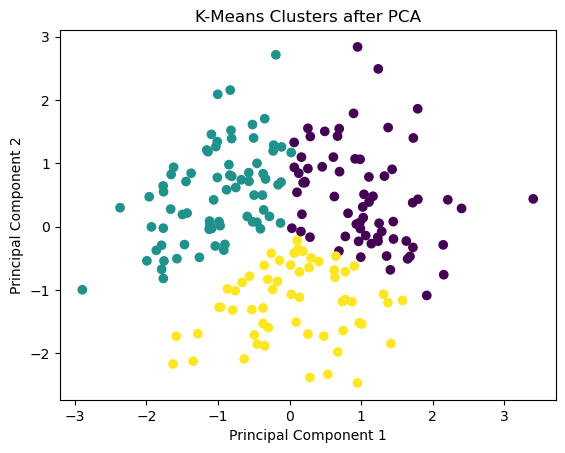

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 2: Apply K-Means before PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Step 3: Calculate silhouette score and WCSS before PCA
silhouette_before_pca = silhouette_score(scaled_data, kmeans_labels)
wcss_before_pca = kmeans.inertia_
print(f"Silhouette Score before PCA: {silhouette_before_pca}")
print(f"WCSS before PCA: {wcss_before_pca}")

# Step 4: Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 5: Apply K-Means after PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

# Step 6: Calculate silhouette score and WCSS after PCA
silhouette_after_pca = silhouette_score(pca_data, kmeans_pca_labels)
wcss_after_pca = kmeans_pca.inertia_
print(f"Silhouette Score after PCA: {silhouette_after_pca}")
print(f"WCSS after PCA: {wcss_after_pca}")

# Step 7: Plot the PCA results
import matplotlib.pyplot as plt
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.title("K-Means Clusters after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Interpretation:

Silhouette Score: This measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters. The increase from 0.1529 to 0.3610 suggests that the clusters are more distinct and better defined after PCA.

WCSS: This measures the total variance within clusters. A lower WCSS indicates tighter clusters. The decrease from 723.93 to 190.42 indicates that the data points are closer to their respective cluster centers after PCA, suggesting more compact clusters.
In summary, applying PCA has improved the clustering quality by making the clusters more distinct and compact.

### **Final Recommendations**

* Use PCA if the silhouette score remains stable or improves after PCA and WCSS remains low, especially when you need to reduce the dataset's dimensionality for better computational efficiency.

* Retain Original Data if PCA leads to a significant drop in silhouette score or if the clusters become less distinct after dimensionality reduction.

## **Data Recommendation**

* Personalized Wellness Plans​

* Efficient Resource Allocation​

* Predictive Health Interventions​

* Improved Health Outcomes​
